## Simulation of data using Julia

### Rohan L. Fernando

### November 2015

## Julia Packages 
* [List of registered Julia packages](http://pkg.julialang.org) 
* Will use [Distributions Package](http://distributionsjl.readthedocs.org/en) to simulate data. 
* It can be added to your system with the command:

In [ ]:
#Pkg.add("Distributions")

* This needs to be done only once. 

* But, to access the functions in the Distributions package the "using" command has to be invoked as:


In [1]:
using Distributions

## Simulate matrix of ``genotype" covariates

In [2]:
nRows = 10
nCols = 5
X = sample([0;1;2],(nRows,nCols))

10x5 Array{Int64,2}:
 0  0  2  0  1
 2  1  1  0  0
 0  0  2  2  0
 0  2  1  2  0
 0  2  2  1  2
 2  1  2  2  2
 1  2  0  1  1
 1  0  2  1  2
 2  0  0  2  0
 2  2  2  0  2

Each element in $\mathbf{X}$ is sampled from the array [0,1,2]. 

## Other methods of the function ``sample"

In [3]:
methods(sample)

# 7 methods for generic function "sample":
sample(a::AbstractArray{T,N}) at /Users/rohan/.julia/v0.4/StatsBase/src/sampling.jl:277
sample{T}(a::AbstractArray{T,N}, n::Integer) at /Users/rohan/.julia/v0.4/StatsBase/src/sampling.jl:320
sample{T}(a::AbstractArray{T,N}, dims::Tuple{Vararg{Int64}}) at /Users/rohan/.julia/v0.4/StatsBase/src/sampling.jl:324
sample(wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/rohan/.julia/v0.4/StatsBase/src/sampling.jl:335
sample(a::AbstractArray{T,N}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/rohan/.julia/v0.4/StatsBase/src/sampling.jl:347
sample{T}(a::AbstractArray{T,N}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}, n::Integer) at /Users/rohan/.julia/v0.4/StatsBase/src/sampling.jl:529
sample{T}(a::AbstractArray{T,N}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}, dims::Tuple{Vararg{Int64}}) at /Users/rohan/.julia/v0.4/StatsBase/src/sampling.jl:532

## Add a column of ones for intercept

In [4]:
X = [ones(nRows,1) X]

10x6 Array{Float64,2}:
 1.0  0.0  0.0  2.0  0.0  1.0
 1.0  2.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  2.0  2.0  0.0
 1.0  0.0  2.0  1.0  2.0  0.0
 1.0  0.0  2.0  2.0  1.0  2.0
 1.0  2.0  1.0  2.0  2.0  2.0
 1.0  1.0  2.0  0.0  1.0  1.0
 1.0  1.0  0.0  2.0  1.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0
 1.0  2.0  2.0  2.0  0.0  2.0

## Simulate effects from normal distribution

In [5]:
nRowsX, nColsX = size(X)
mean = 0.0
std  = 0.5
b = rand(Normal(mean,std),nColsX)

6-element Array{Float64,1}:
 -0.784395
  0.87821 
  0.714257
 -0.439881
  0.30109 
 -0.834222

## Simulate phenotypic values

In [6]:
resStd = 1.0
y = X*b + rand(Normal(0,resStd),nRowsX)

10-element Array{Float64,1}:
 -2.85294 
  1.95599 
 -1.92352 
  0.568759
 -1.33026 
  1.00019 
  0.442988
 -4.11003 
  0.512736
  0.897029

## Function to simulate data


In [7]:
using Distributions
function simDat(nObs,nLoci,bMean,bStd,resStd)
    X = [ones(nObs,1) sample([0;1;2],(nObs,nLoci))]
    b = rand(Normal(bMean,bStd),size(X,2))
    y = X*b + rand(Normal(0.0, resStd),nObs)
    return (y,X,b)
end

simDat (generic function with 1 method)

## Use of function simDat to simulate data

In [8]:
nObs     = 10
nLoci    = 5
bMean    = 0.0
bStd     = 0.5
resStd   = 1.0
res = simDat(nObs,nLoci,bMean,bStd,resStd)
y = res[1]
X = res[2]
b = res[3]

6-element Array{Float64,1}:
  0.347378 
  0.234197 
 -0.131814 
 -0.845628 
  0.0233665
  0.123051 

## XSim: Genome sampler

* Simulate SNPs on chromosomes
* Random mating in finite population to generate LD
* Efficient algorithm for sampling sequence data
* [XSim paper](http://g3journal.org/content/early/2015/05/07/g3.115.016683.full.pdf+html)

## Install XSim

In [ ]:
# installing package 
# only needs to be done once
#Pkg.clone("https://github.com/reworkhow/XSim.jl.git")

## Initialize sampler

In [9]:
using XSim
chrLength = 1.0
numChr    = 1
numLoci   = 2000
mutRate   = 0.0
locusInt  = chrLength/numLoci
mapPos   = collect(0:locusInt:(chrLength-0.0001))
geneFreq = fill(0.5,numLoci)
XSim.init(numChr,numLoci,chrLength,geneFreq,mapPos,mutRate) 

## Simulate random mating in finite population

### Sample Founders

In [10]:
popSizeFounder = 500
sires = sampleFounders(popSizeFounder)
dams  = sampleFounders(popSizeFounder)
nothing

Sampling 500 animals into base population.
Sampling 500 animals into base population.


### Random Mating 

In [11]:
ngen,popSize = 20,500
sires1,dams1,gen1 = sampleRan(popSize, ngen, sires, dams);

Generation     2: sampling   250 males and   250 females
Generation     3: sampling   250 males and   250 females
Generation     4: sampling   250 males and   250 females
Generation     5: sampling   250 males and   250 females
Generation     6: sampling   250 males and   250 females
Generation     7: sampling   250 males and   250 females
Generation     8: sampling   250 males and   250 females
Generation     9: sampling   250 males and   250 females
Generation    10: sampling   250 males and   250 females
Generation    11: sampling   250 males and   250 females
Generation    12: sampling   250 males and   250 females
Generation    13: sampling   250 males and   250 females
Generation    14: sampling   250 males and   250 females
Generation    15: sampling   250 males and   250 females
Generation    16: sampling   250 males and   250 females
Generation    17: sampling   250 males and   250 females
Generation    18: sampling   250 males and   250 females
Generation    19: sampling   25

## Get genotypes

In [12]:
animals = concatCohorts(sires1,dams1)
M = getOurGenotypes(animals)

500x2000 Array{Int64,2}:
 0  1  1  0  2  1  1  1  1  1  1  1  0  …  2  2  2  1  1  0  1  1  2  1  1  2
 1  1  2  0  1  1  1  0  1  2  0  0  1     0  1  0  1  2  0  1  2  2  1  2  1
 2  1  0  2  1  1  1  2  1  1  1  1  0     1  0  2  1  0  1  1  2  1  2  0  0
 1  1  1  1  1  2  1  1  2  2  2  1  2     0  0  1  2  2  0  1  2  1  1  2  1
 0  0  1  2  0  1  0  1  1  0  1  1  0     1  2  2  2  2  2  0  1  0  1  1  2
 0  0  1  0  0  1  0  2  2  2  0  1  1  …  0  2  0  1  1  1  0  2  1  0  2  1
 2  0  0  2  1  1  1  1  1  2  0  0  1     1  1  0  2  0  2  0  1  0  0  1  0
 1  2  1  2  1  1  1  1  1  0  1  0  1     1  1  1  0  2  1  1  2  2  1  2  2
 2  1  1  1  2  1  1  2  1  0  1  2  1     2  1  0  1  1  1  0  1  1  2  1  1
 1  0  2  2  1  1  1  1  2  0  1  2  0     0  1  1  1  2  1  1  2  1  1  1  1
 1  1  2  1  1  1  0  0  1  1  0  1  1  …  1  2  1  1  2  2  0  1  0  2  0  0
 1  1  1  2  0  0  0  1  0  1  0  0  0     0  0  2  1  1  0  1  2  1  0  1  1
 1  0  1  0  0  0  0  1  1  2  0  2  1 

## Randomly sample QTL positions 

In [13]:
nQTL   = 50
selQTL = fill(false,numLoci)
selQTL[sample(1:numLoci,nQTL,replace=false)] = true 
selMrk = !selQTL;

## QTL and marker matrices

In [14]:
Q = M[:,selQTL]

500x50 Array{Int64,2}:
 1  2  1  0  2  0  0  2  1  0  0  0  2  …  2  1  0  2  1  1  0  0  1  1  1  2
 2  1  1  1  0  2  0  1  0  1  2  0  1     2  2  1  2  1  1  2  1  1  0  1  2
 1  2  2  2  0  1  1  2  1  2  0  1  1     1  0  2  1  0  0  1  0  1  1  1  0
 2  2  1  2  1  1  1  2  0  1  1  0  1     1  1  2  1  2  1  1  1  0  2  1  1
 0  0  1  0  1  1  2  2  1  2  1  1  1     2  1  2  2  1  0  2  0  0  2  0  1
 2  2  1  1  1  1  2  2  1  2  0  1  1  …  1  1  2  2  0  0  1  0  0  0  1  1
 2  1  1  2  0  0  2  2  2  2  0  1  2     1  1  0  0  1  1  0  1  1  1  1  1
 0  1  0  1  1  1  1  2  0  2  2  2  2     2  1  1  2  1  2  0  1  0  1  1  2
 0  1  0  2  0  1  1  2  2  2  1  0  1     0  0  0  1  0  1  2  0  1  2  1  2
 0  0  0  1  1  1  0  2  2  1  1  0  0     0  2  0  1  2  0  1  0  1  1  0  2
 1  2  1  1  2  2  2  1  1  1  1  2  2  …  1  0  0  1  1  2  1  2  0  1  0  1
 1  1  1  2  0  0  1  2  1  1  1  1  2     2  0  0  1  1  1  2  1  1  1  2  2
 2  1  2  2  1  1  1  2  0  0  1  0  1   

In [15]:
X = M[:,selMrk]

500x1950 Array{Int64,2}:
 0  1  1  0  2  1  1  1  1  1  1  0  0  …  2  2  2  1  1  0  1  1  2  1  1  2
 1  1  2  0  1  1  1  0  1  0  0  1  1     0  1  0  1  2  0  1  2  2  1  2  1
 2  1  0  2  1  1  1  2  1  1  1  0  1     1  0  2  1  0  1  1  2  1  2  0  0
 1  1  1  1  1  2  1  1  2  2  1  2  1     0  0  1  2  2  0  1  2  1  1  2  1
 0  0  1  2  0  1  0  1  1  1  1  0  1     1  2  2  2  2  2  0  1  0  1  1  2
 0  0  1  0  0  1  0  2  2  0  1  1  2  …  0  2  0  1  1  1  0  2  1  0  2  1
 2  0  0  2  1  1  1  1  1  0  0  1  1     1  1  0  2  0  2  0  1  0  0  1  0
 1  2  1  2  1  1  1  1  1  1  0  1  2     1  1  1  0  2  1  1  2  2  1  2  2
 2  1  1  1  2  1  1  2  1  1  2  1  0     2  1  0  1  1  1  0  1  1  2  1  1
 1  0  2  2  1  1  1  1  2  1  2  0  0     0  1  1  1  2  1  1  2  1  1  1  1
 1  1  2  1  1  1  0  0  1  0  1  1  1  …  1  2  1  1  2  2  0  1  0  2  0  0
 1  1  1  2  0  0  0  1  0  0  0  0  1     0  0  2  1  1  0  1  2  1  0  1  1
 1  0  1  0  0  0  0  1  1  0  2  1  1 

## Simulation of breeding values and phenotypic values

In [16]:
nQTL = size(Q,2)
nObs = size(Q,1)
α = rand(Normal(0,1),nQTL)
a = Q*α
# scaling breeding values to have variance 25.0
v = var(a)
genVar = 25.0
a *= sqrt(genVar/v)
va = var(a)
# formatted printing
@printf "genetic variance = %8.2f  " va

genetic variance =    25.00  

In [17]:
resVar = 75.0
resStd = sqrt(resVar)
e = rand(Normal(0,resStd),nObs)
y = 100 + a + e
@printf "phenotypic mean     = %8.2f  \n" Base.mean(y)
@printf "phenotypic variance = %8.2f  \n" var(y)

phenotypic mean     =   108.39  
phenotypic variance =    91.74  


## Simulate Crossbreeding using XSim

In [18]:
ngen,popSize = 20,500
siresA,damsA,gen1   = sampleRan(popSize, ngen, sires,  dams)
siresB,damsB,gen1   = sampleRan(popSize, ngen, sires,  dams)
siresAB,damsAB,gen1 = sampleRan(popSize, ngen, siresA, damsB,gen=gen1);

Generation     2: sampling   250 males and   250 females
Generation     3: sampling   250 males and   250 females
Generation     4: sampling   250 males and   250 females
Generation     5: sampling   250 males and   250 females
Generation     6: sampling   250 males and   250 females
Generation     7: sampling   250 males and   250 females
Generation     8: sampling   250 males and   250 females
Generation     9: sampling   250 males and   250 females
Generation    10: sampling   250 males and   250 females
Generation    11: sampling   250 males and   250 females
Generation    12: sampling   250 males and   250 females
Generation    13: sampling   250 males and   250 females
Generation    14: sampling   250 males and   250 females
Generation    15: sampling   250 males and   250 females
Generation    16: sampling   250 males and   250 females
Generation    17: sampling   250 males and   250 females
Generation    18: sampling   250 males and   250 females
Generation    19: sampling   25

## Calculate and plot gene frequencies 

In [19]:
freq=Base.mean(M,1)/2;

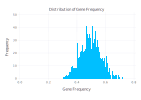

In [20]:
using Gadfly
plot(x=freq,Geom.histogram,
Guide.title("Distribution of Gene Frequency"),
Guide.ylabel("Frequency"),
Guide.xlabel("Gene Frequency"))

In [21]:
;ipython nbconvert --to slides dataSimulation.ipynb

[NbConvertApp] Converting notebook dataSimulation.ipynb to slides
[NbConvertApp] Writing 411959 bytes to dataSimulation.slides.html
